In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: D4A58DGD


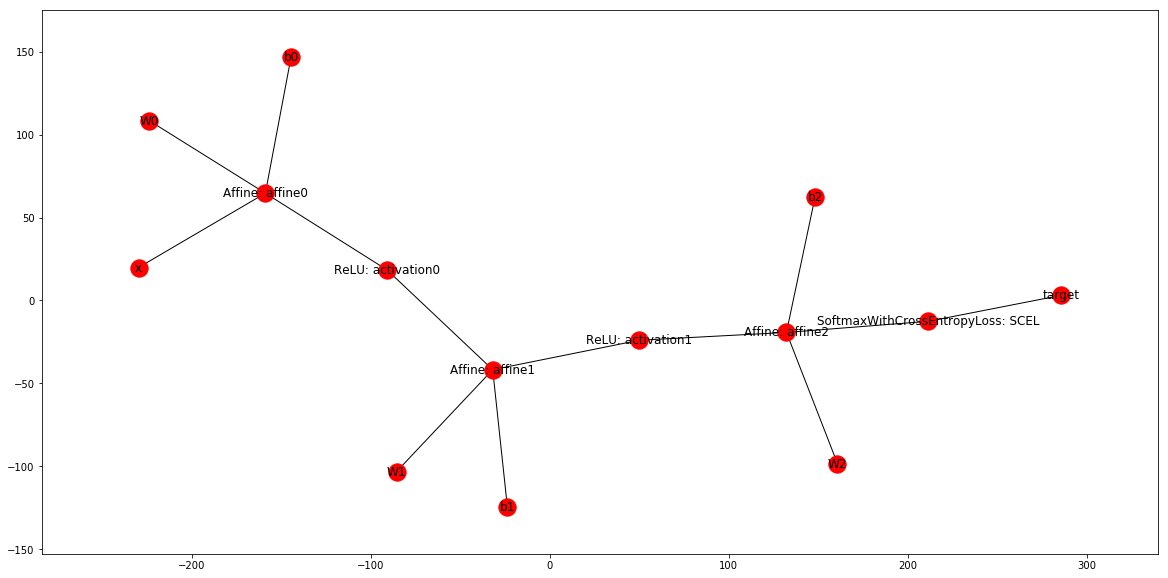

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
%timeit -n1 -r1 n.learning(max_epoch=5, data=data, batch_size=batch_size, print_period=1, is_numba=True, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1406
-- Learning Started --
Epoch   0 Completed - Train Error: 2.299510 - Validation Error: 2.306139 - Test Accuracy: 0.140600
Epoch   1 Completed - Train Error: 0.374700 - Validation Error: 0.363796 - Test Accuracy: 0.892200
Epoch   2 Completed - Train Error: 0.300293 - Validation Error: 0.291420 - Test Accuracy: 0.915100
Epoch   3 Completed - Train Error: 0.213879 - Validation Error: 0.258458 - Test Accuracy: 0.919500
Epoch   4 Completed - Train Error: 0.243827 - Validation Error: 0.257756 - Test Accuracy: 0.924600
Epoch   5 Completed - Train Error: 0.246825 - Validation Error: 0.247768 - Test Accuracy: 0.924400

[Best Epoch (based on Validation Error) and Its Performance]
Epoch   5 Completed - Train Error: 0.246825 - Validation Error: 0.247768 - Test Accuracy: 0.924400
Params are set to the best model!!!
-- Learning Finished --

1 loop, best of 1: 10.9 s per loop
Post-learning Accuracy 0.9244


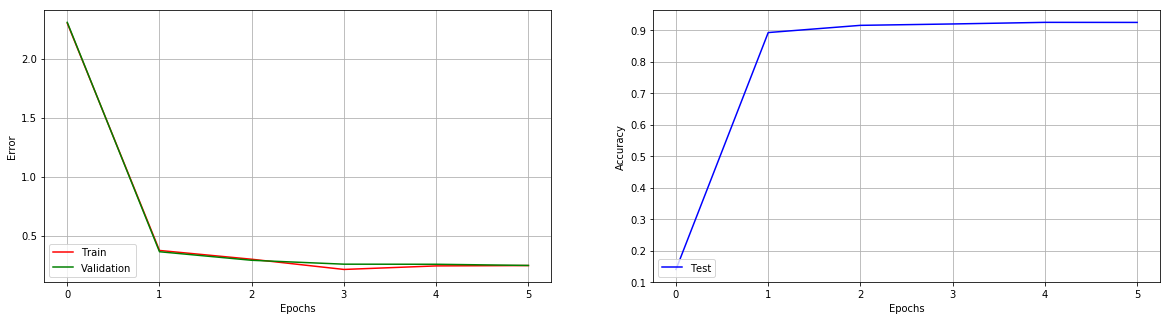

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 8, Prediction: Six, Ground Truth: Five
False Prediction Index: 11, Prediction: Two, Ground Truth: Six
False Prediction Index: 18, Prediction: Two, Ground Truth: Three
False Prediction Index: 33, Prediction: Zero, Ground Truth: Four
False Prediction Index: 38, Prediction: Three, Ground Truth: Two


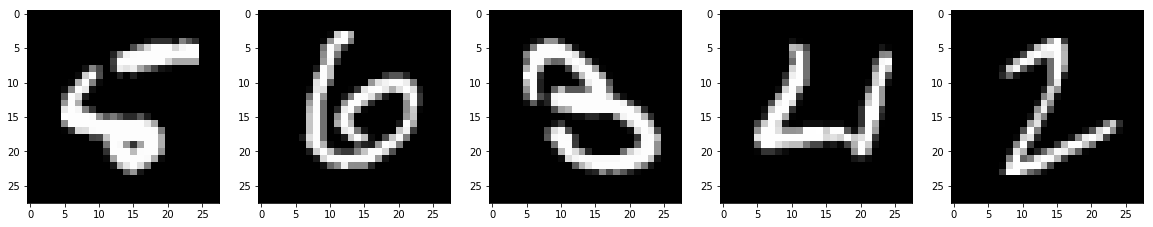

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

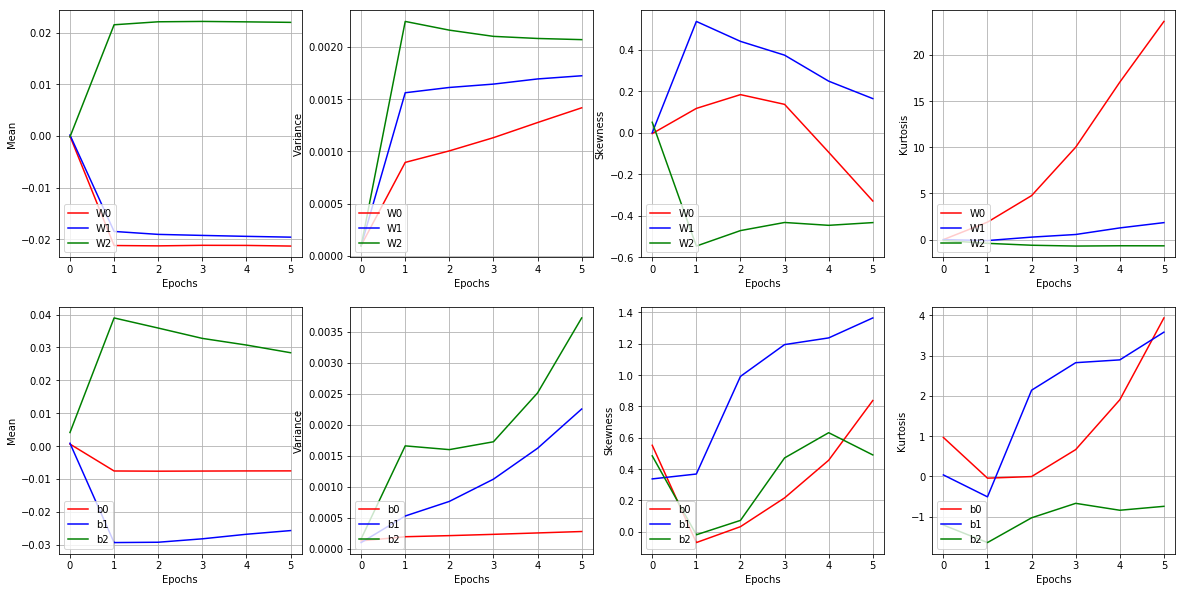

In [8]:
n.draw_param_description(figsize=(20, 10))